# Linear Regression With One Variable

In [7]:
'''
This is a python implementation of the Linear Regression exercise in week 2 of Coursera's online Machine Learning 
course, taught by Dr. Andrew Ng. We are provided with data for population of cities and profit made in each city by
a restaurant. The task is to use linear regression to determine new cities the restaurant needs to expand 
to, considering the data provided. The task here is to dtermine how population affects profit.
'''

#Let's start by importing relevant python libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
'''
Let's import the data into a Pandas dataframe called data. The path provided is the location of the file 
(ex1data.txt) containing the dataset. I placed the file on my desktop. There are 2 columns in the data, Population
and Profit. 
'''

data = pd.read_csv('C://Users//chex2//Desktop/ex1data1.txt', names=['Population', 'Profit']) 

In [9]:
data.head()# Viewing the first 5 records in the dataset.

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Text(0.5, 1.0, 'Scatter Plot of Training Data')

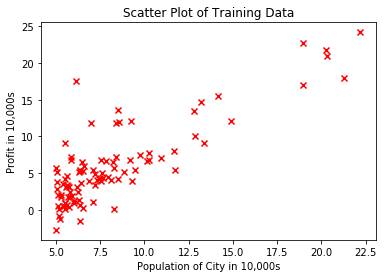

In [12]:
'''
We need to visualize the relationship between Population and Profit. We will use a matplotlib to create a 
scatter plot
'''
X = data['Population'].values #Assign the values in the 'Population' column to X
y = data['Profit'].values #Assign the values in the 'Profit' column to y
m = len(y)#This is the length of the training set
plt.scatter(X,y, c='red', marker='x')#Plot Population by Profit using a scatter plot
plt.ylabel('Profit in 10,000s')#Label on the y axis
plt.xlabel('Population of City in 10,000s')#Label on the X axis
plt.title('Scatter Plot of Training Data')#Title for the plot

#The plot is shown below:

In [13]:
'''The next task is to use gradient descent to minimize the cost (error of prediction). Before we do that let's 
determine the current cost.
'''
X = np.append(np.ones([m,1]), X.reshape(m,1), axis=1)#Append the bias term to X and reshape X to a mx1 matrix
y = y.reshape(m,1)#Reshape y to mx1 matrix
theta = np.zeros([2,1])#Set initial coefficient to zero

def computeCost(X,y, theta):
    '''
    This fuction takes in the X and y matrices as well as the intial 
    theta values(coefficiets) and returns the cost(error of prediction)
    '''
    m = len(y)#This is the length of the training set
    #h = np.dot(X,theta)
    h = X.dot(theta)#The hypothesis
    J = 1/(2*m)*(np.sum((h-y)**2))#The cost function
    return J #return the cost

cost = computeCost(X,y, theta)#Call the function and pass in values for X, y, and theta to compute the cost.
print(cost)#Print out the cost

32.072733877455676


In [15]:
'''
Now that we know the cost, we will use gradient descent to minimize it. We will use alpha to represent the 
learning rate and run the algorithm for 1500 iterations
'''
iter = 1500
alpha = 0.01

def gradientDescent(X, y, theta, alpha, iter):
    '''
    This fuction takes in the X and y matrices, the intial theta values(coefficiets), the learning rate, 
    and the number of iterations. The output will be the a new set of coefficeint of the linear regression (theta),
    optimized for making predictions.
    '''
    
    J_history = []#Array for storing the cost values for each iteration
    m = len(y)#This is the length of the training set
    
    for i in range(iter): #Loop for 1500 iterations
        #temp1 = np.dot(X, theta) - y
        #temp2 = np.dot(X.T, temp1)
        #theta = theta - (alpha/m) * temp2        
        #h = np.dot(X,theta)
        h = X.dot(theta) # The hypothesis
        theta = theta - (alpha/m)*(X.T.dot(h-y))   #Gradient descent function
        J_history.append(computeCost(X, y, theta))  #Append the cost to the J+history array
    return theta, J_history     #return the final values of theta and the J_history array

In [17]:
#Call the function and pass in values for X, y, and theta, alpha, and iter to compute 
#new coefficient values.

new_theta, J_history = gradientDescent(X, y, theta, alpha, iter)
print(new_theta)

[[-3.63029144]
 [ 1.16636235]]


In [19]:
#Using the new values of the coeffient to compute the cost, we see a huge improvement. From 32.07 to 4.48

new_cost = computeCost(X,y, new_theta)
print(new_cost)

4.483388256587725


In [ ]:
#Now we plot the linear regression on the training data

plt.scatter(X[:,1].reshape([m,1]),y, c='red', marker='x', label='Training Data')
plt.plot(X[:,1].reshape([m,1]), np.dot(X, new_theta), label='Linear Regression')
plt.ylabel('Profit in 10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()
plt.title('Training Data with Linear Regression Fit')

In [20]:
# PREDICTIONS
#Now we define a function for predictiing profit gieving population of a city

First_City = 3500
Second_City = 70000

def prediction(X, new_theta):
    '''
    This fucntion takes in population and predicts profit.
    '''
    pred = np.dot(X,new_theta)* 10000 #We use the new coffeicients derived from the gradient descent algorithm.
    return pred #The prediction

predict1 = (prediction(([1, 3.5]),(new_theta)))
predict2 = (prediction(([1, 7]),(new_theta)))

print(f'For a population of {First_City} people, profit will be {predict1[0]} ')#Print prediction1
print(f'For a population of {Second_City} people, profit will be {predict2[0]}')#Print prediction2

For a population of 3500 people, profit will be 4519.7678677017675 
For a population of 70000 people, profit will be 45342.45012944714
